Avocado Price prediction- A regression problem
Avocado is a fruit and it is liked by United state people mostly. it comes in different varieties and sizes. Product code is also given to them. There has also grown in two ways one is conventional and second one in organic ways. it is labeled as organic after meeting all the organic compliance patameters.

About dataset:
Dataset has pure 1517 observations with 13 columns including one target. Dataset has lot of missing values which needs treatment. features details are mentioned below

Feature details
Date == The date of the observation
AveragePrice == the average price of a single avocado
type == conventional or organic
year == The year
Region == the city or region of the observation
Total Volume == Total number of avocados sold
4046 == Total number of avocados with PLU 4046 sold
4225 == Total number of avocados with PLU 4225 sold
4770 == Total number of avocados with PLU 4770 sold<> Total Bags == Numbe of bags used Small Bags == number of small bag used large bags = Number of large bag used XLarge bags = number of Xtra lage bag used


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [53]:
avocado_ds = pd.read_csv("avocado.csv")

In [54]:
avocado_ds.head() # checking top 5 observations


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [55]:
avocado_ds.tail()# checking last 5 observations

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [56]:
avocado_ds.info() # checking information about the data set and its columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Info function gives information that no missing value in the data but while checking the tail, it has obsered some missing data. we will correct that.
we have 13 columsn including Target column. 3 columsn are objects type and resta are all numeric in nature. we have date column also which is current object type, we will change its data type as well to datetime

In [57]:
# deleting the unnamed column from the dataset as it has its own index
avocado_ds.drop("Unnamed: 0",axis=1, inplace = True)

In [58]:
# checking the shape of the dataset and columns in it
print(avocado_ds.shape)
print(avocado_ds.columns)

(18249, 13)
Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


Unnamed has been deleted successfully from the data set. now we will clean the dataset.

In [59]:
# creating deep copy 
avocado_ds_work_file = avocado_ds.copy()

In [60]:
# replace the NaN with np.nan just to ensure it NaN wasnt actual NAN. 
avocado_ds_work_file.replace({"NaN": np.nan},inplace=True)

In [61]:
# function for checking missing values
def missing_val(x):
  missing = {}
  for i in avocado_ds_work_file.columns:
    if avocado_ds_work_file[i].isnull().sum()> 0:
      missing[i] = avocado_ds_work_file[i].isnull().sum()
  print(missing,end = " ")


In [62]:
# calling the function
missing_val(avocado_ds_work_file)
print("\n")
print("Percentage of missing data:\n",avocado_ds_work_file.isnull().sum()/len(avocado_ds_work_file)*100)

{} 

Percentage of missing data:
 Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64


In [63]:
# dropping null value
avocado_ds_work_file.dropna(inplace=True)
missing_val(avocado_ds_work_file) # checking missing value a

{} 

In [64]:
# we have date column also in dataset and its datatype is objects, lets change into datetime format
avocado_ds_work_file["Date"] = pd.to_datetime(avocado_ds_work_file["Date"])
avocado_ds_work_file.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [65]:
# updating original files
avocado_ds = avocado_ds_work_file.copy()

In [66]:
avocado_ds.describe().round(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.00000,18249.00000
mean,1.40598,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.42651,2016.14790
std,0.40268,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.89465,0.93994
min,0.44000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,2015.00000
25%,1.10000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.00000,2015.00000
50%,1.37000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.00000,2016.00000
75%,1.66000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.50000,2017.00000
max,3.25000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.65000,2018.00000


In [68]:
avocado_ds.select_dtypes(include="object").describe()# describing the objects data types

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


EDA

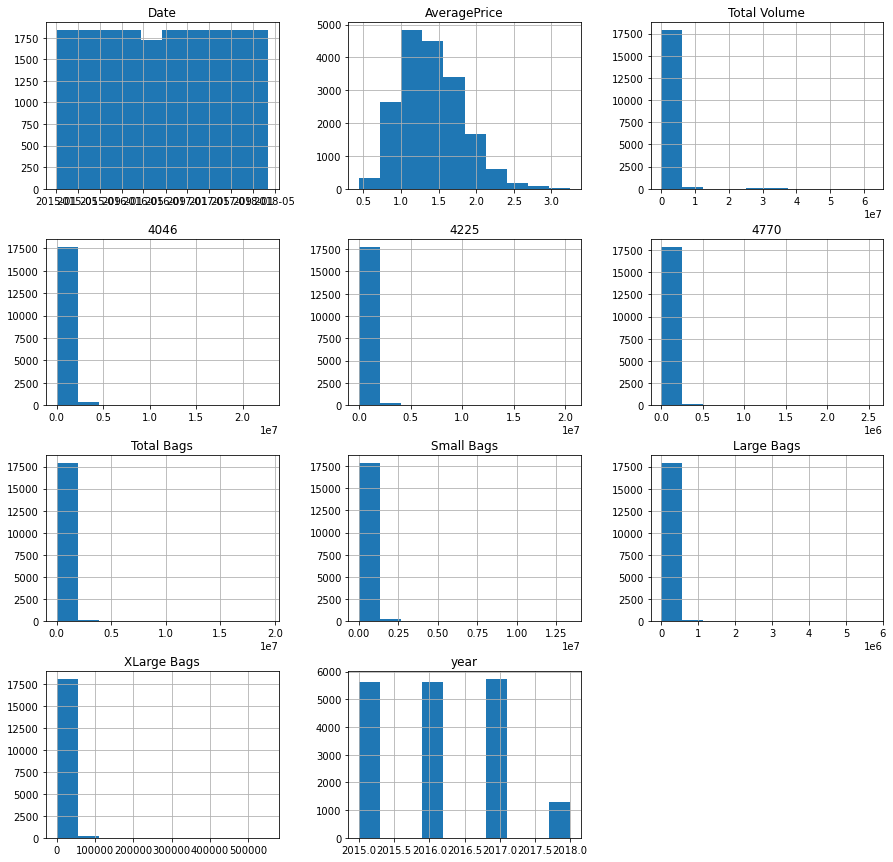

In [69]:
# checking the distribution of the numeric features
avocado_ds.select_dtypes(exclude="object").hist(figsize= (15,15)); 

In [70]:
avocado_ds.rename(columns={"4046":"PLU_4046","4225":"PLU_4225","4770":"PLU_4770"},inplace=True)
avocado_ds.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [71]:
# saving numeric data into a variable for nmeric operation
num_data = avocado_ds[["Total Volume",	"PLU_4046"	,"PLU_4225",	"PLU_4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]

In [72]:
# checking the skewness
num_data.skew()

Total Volume     9.007687
PLU_4046         8.648220
PLU_4225         8.942466
PLU_4770        10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [73]:
avocado_ds_analysis_data = avocado_ds.copy() # creating a copy for further analysis

In [74]:
avocado_ds_analysis_data["Date"] = pd.to_datetime(avocado_ds_analysis_data["Date"],format = "%d/%m/%Y") 


In [75]:
avocado_ds_analysis_data.dtypes


Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_4046               float64
PLU_4225               float64
PLU_4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [76]:
avocado_ds_analysis_data["Day"] =  avocado_ds_analysis_data["Date"].dt.day
avocado_ds_analysis_data["year"] =  avocado_ds_analysis_data["Date"].dt.year
avocado_ds_analysis_data["Month"] =  avocado_ds_analysis_data["Date"].dt.month
avocado_ds_analysis_data["week"] =  avocado_ds_analysis_data["Date"].dt.week

In [77]:
avocado_ds_analysis_data.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,50
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,49
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,48


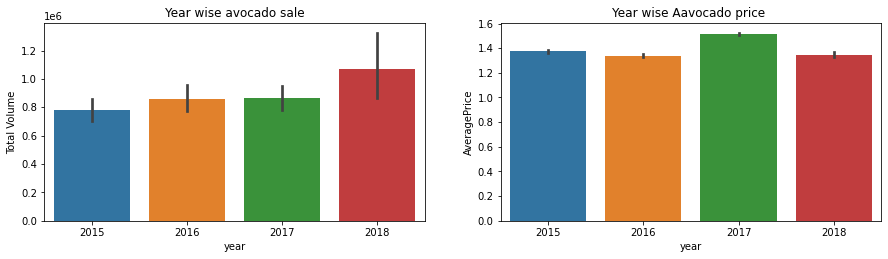

In [78]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(x = "year", y = "Total Volume", data = avocado_ds_analysis_data)
plt.title("Year wise avocado sale");

plt.subplot(222)
sns.barplot(x = "year", y = "AveragePrice", data = avocado_ds_analysis_data)
plt.title("Year wise Aavocado price ");

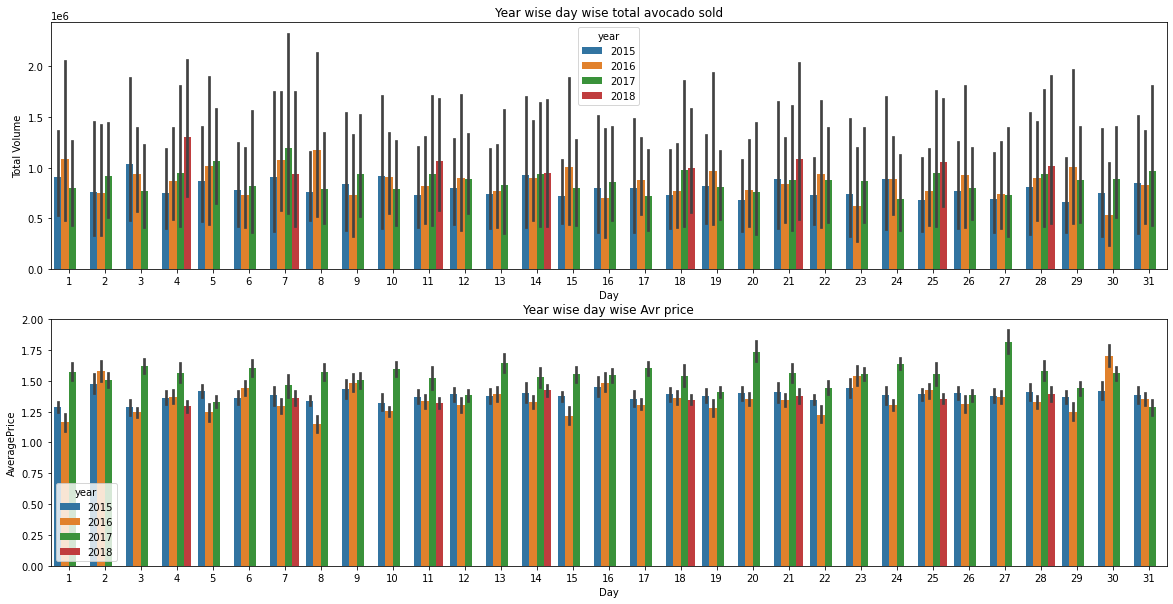

In [79]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Day", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise total avocado sold");

plt.subplot(212)
sns.barplot(x = "Day", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise Avr price");

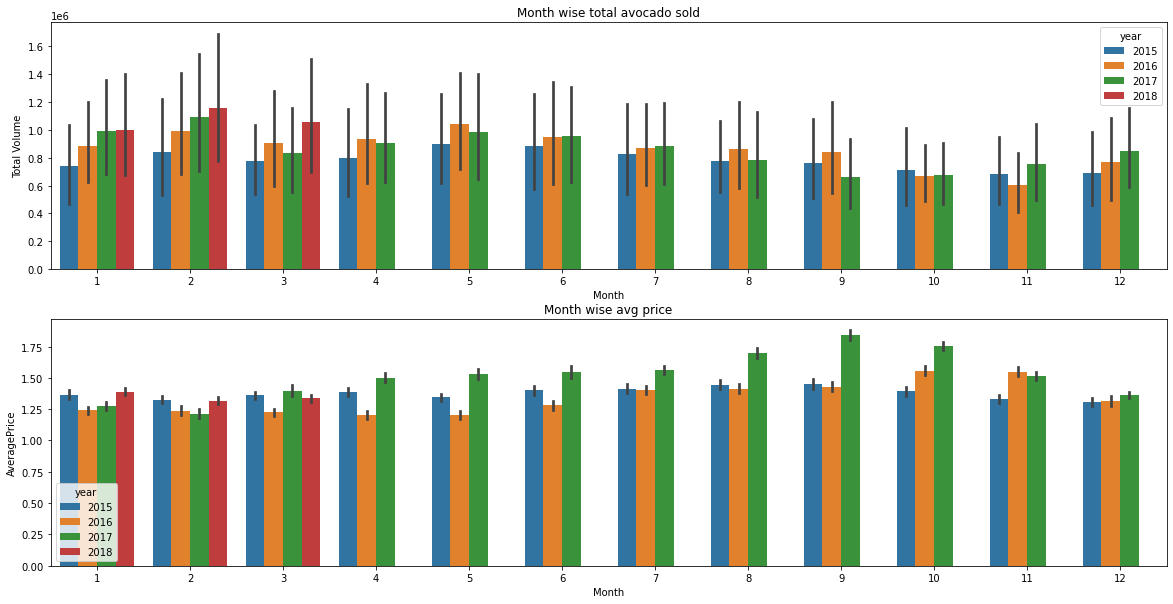

In [80]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Month", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "Month", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise avg price");

Text(0.5, 1.0, 'week wise avg price')

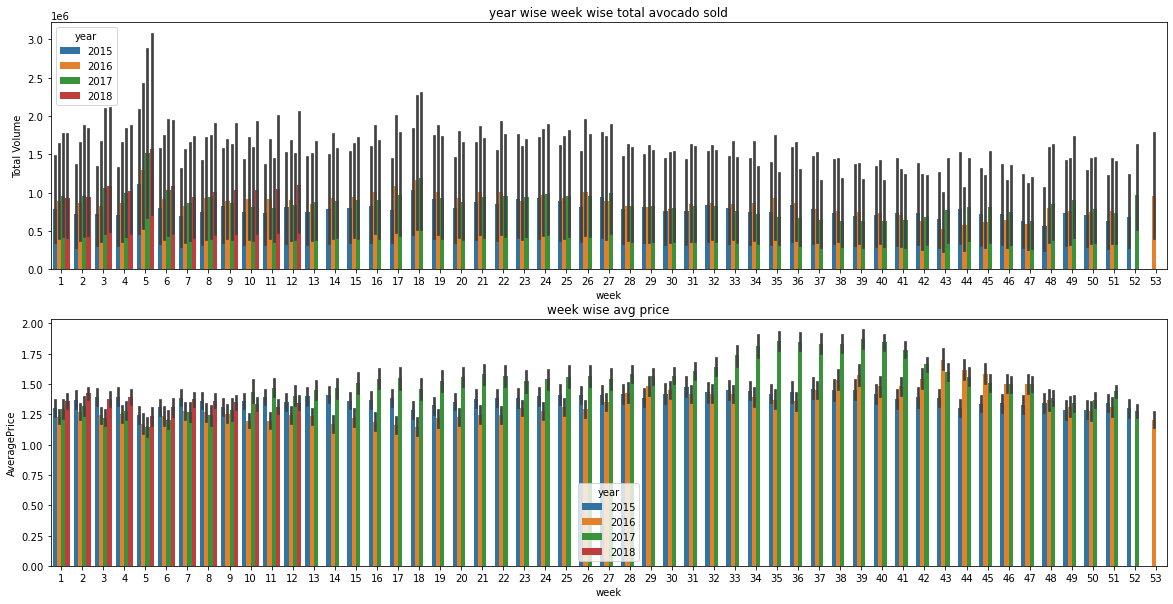

In [81]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "week", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("year wise week wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "week", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("week wise avg price")

In [82]:
avocado_ds.groupby("region")[["Total Volume","AveragePrice"]].mean().sort_values(by ="Total Volume" ,ascending = False)


,Total Volume,AveragePrice
region,,
TotalUS,1.735130e+07,1.319024
West,3.215323e+06,1.272219
California,3.044324e+06,1.395325
SouthCentral,2.991952e+06,1.101243
Northeast,2.110299e+06,1.601923
Southeast,1.820232e+06,1.398018
GreatLakes,1.744505e+06,1.338550
Midsouth,1.503992e+06,1.404763
LosAngeles,1.502653e+06,1.216006


In [83]:
avocado_ds.drop(columns=["Small Bags","Large Bags"],axis = 1, inplace = True)


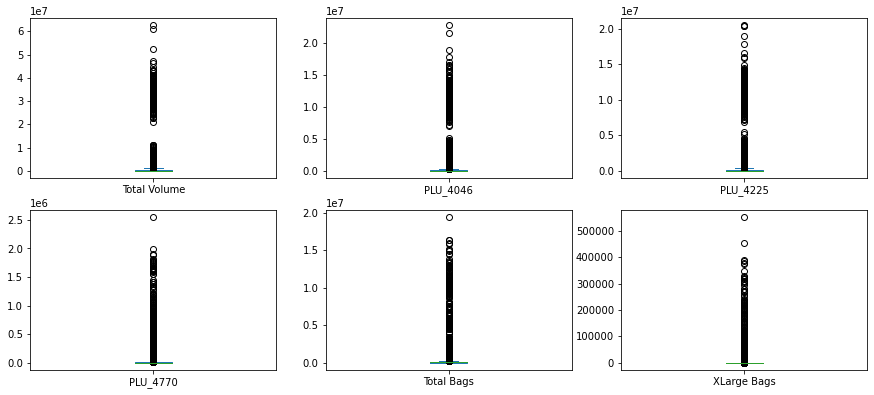

In [84]:
num_data = avocado_ds_analysis_data[["Total Volume","PLU_4046"	,"PLU_4225",	"PLU_4770","Total Bags","XLarge Bags"]]

num_data.plot(kind = "box", subplots = True, layout=(3,3), figsize = (15,10));

# Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

lb = LabelEncoder()
lb.fit(avocado_ds["region"])

avocado_ds["region"] = lb.transform(avocado_ds["region"])

In [86]:
avocado_ds.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,conventional,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,conventional,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,conventional,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,conventional,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,conventional,2015,0


In [87]:
avocado_ds.tail(10)

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
18239,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,0.0,organic,2018,53
18240,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,0.0,organic,2018,53
18241,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,0.0,organic,2018,53
18242,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,0.0,organic,2018,53
18243,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,0.0,organic,2018,53
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,0.0,organic,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,0.0,organic,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,0.0,organic,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,0.0,organic,2018,53
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,0.0,organic,2018,53


In [88]:
# Treating the outlier with zscore and delete the date and year columns, i kept it for EDA purpose.
avocado_ds.drop(columns=["Date","year","type"],axis = 1,inplace = True)

score = np.abs(zscore(avocado_ds))

new_avocado_ds = avocado_ds[(score <3).all(axis = 1)]

# how much data lost post outlier treamement

data_loss = len(new_avocado_ds)/len(avocado_ds)
print(1- data_loss," data we lost after outlier treatment")

0.028001534330648226  data we lost after outlier treatment


In [89]:
from sklearn.preprocessing import power_transform
select_data =new_avocado_ds[["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"]]

print("before",select_data.skew())
select_data = power_transform(select_data,method='yeo-johnson', standardize=False)
tranform_data = pd.DataFrame(select_data)
print("after",tranform_data.skew())

before PLU_4046       4.628222
PLU_4225       4.262080
PLU_4770       4.919251
XLarge Bags    6.063918
dtype: float64
after 0   -0.037857
1   -0.044224
2    0.022830
3    0.839903
dtype: float64


In [90]:
# checking the name of the columsn becaue after power_transform it get convert into numpy array and index value assigned to columns.
tranform_data.rename(columns = {0:"trans_PLU_4046",1:"trans_PLU_4225",2:"trans_PLU_4770",3:"trans_Xlarge Bags"}, inplace = True)
# joining transformed data 

new_avocado_ds = pd.concat([new_avocado_ds,tranform_data],axis = 1,join = "inner")

# since transformed features are added in the data so we need to deleted original one to avoid duplicacy
new_avocado_ds.drop(columns =["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"],axis =1, inplace =True)

In [91]:
new_avocado_ds.skew()

AveragePrice         0.402183
Total Volume         3.697542
Total Bags           4.479318
region               0.021079
trans_PLU_4046      -0.019568
trans_PLU_4225      -0.035632
trans_PLU_4770       0.030491
trans_Xlarge Bags    0.870667
dtype: float64

In [92]:
new_avocado_ds["Total Volume"] = np.log1p(new_avocado_ds["Total Volume"])
new_avocado_ds["Total Bags"] = np.log1p(new_avocado_ds["Total Bags"])

In [93]:
new_avocado_ds.skew()

AveragePrice         0.402183
Total Volume        -0.068264
Total Bags          -0.372818
region               0.021079
trans_PLU_4046      -0.019568
trans_PLU_4225      -0.035632
trans_PLU_4770       0.030491
trans_Xlarge Bags    0.870667
dtype: float64

<AxesSubplot:>

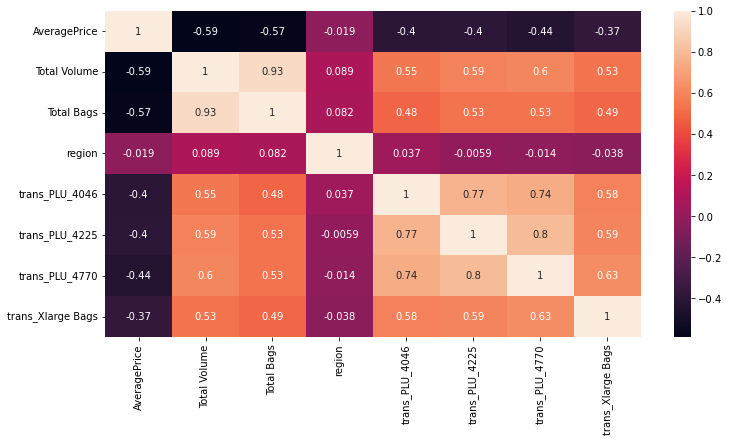

In [94]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True)

In [95]:
new_avocado_dsX_check = new_avocado_ds.copy()

In [96]:
new_avocado_ds.drop("Total Bags",axis =1, inplace = True)

<AxesSubplot:>

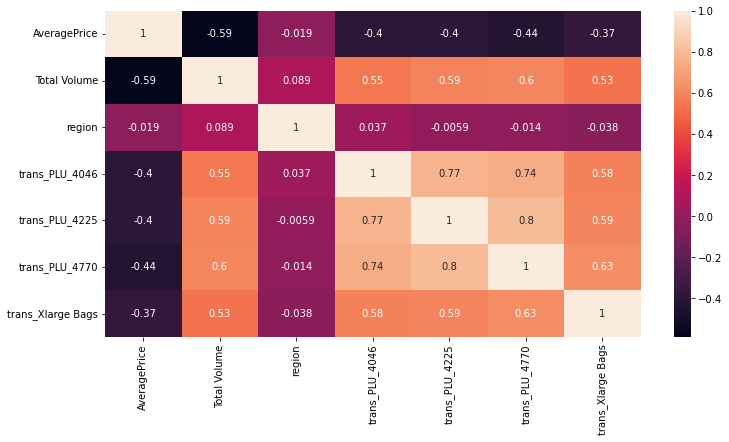

In [98]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True)

# Data is ready for modeling

In [100]:
# seprate data into train and test and create model

X = new_avocado_ds.drop("AveragePrice",axis =1)
y =new_avocado_ds["AveragePrice"]

# Applying standard scaler to scale the data point.

sc = StandardScaler()
X = sc.fit_transform(X)


# we will find best random state wit this for loop.
for i in range(50,500,75):
    LR = LinearRegression()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    LR.fit(X_train,y_train)
    print("Training_score",LR.score(X_train,y_train),"Random_state",i)
    pred = LR.predict(X_test)
    print("test_score",LR.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.3603600789277399 Random_state 50
test_score 0.36175744761978723
Mean_squared_error 0.09789300571189162
R2_scoe 0.36175744761978723 

Training_score 0.35696449665586827 Random_state 125
test_score 0.3757026092970026
Mean_squared_error 0.09365963696151894
R2_scoe 0.3757026092970026 

Training_score 0.3551452666701044 Random_state 200
test_score 0.3823646110063498
Mean_squared_error 0.09491765092945283
R2_scoe 0.3823646110063498 

Training_score 0.3601877664503592 Random_state 275
test_score 0.36266836705641026
Mean_squared_error 0.09621805005387336
R2_scoe 0.36266836705641026 

Training_score 0.36438336699173446 Random_state 350
test_score 0.3455119087983668
Mean_squared_error 0.09896125448615331
R2_scoe 0.3455119087983668 

Training_score 0.36270719885066105 Random_state 425
test_score 0.3519952955082648
Mean_squared_error 0.09699691835945794
R2_scoe 0.3519952955082648 



In [101]:
# testing
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.9725938133839476 Random_state 50
test_score 0.8120474315469436
Mean_squared_error 0.02882797737086477
R2_scoe 0.8120474315469436 

Training_score 0.9733672599427061 Random_state 100
test_score 0.8031323253019396
Mean_squared_error 0.029274775861868836
R2_scoe 0.8031323253019396 

Training_score 0.9725925367258224 Random_state 150
test_score 0.8115063704585355
Mean_squared_error 0.02851020310504933
R2_scoe 0.8115063704585355 

Training_score 0.973311149704223 Random_state 200
test_score 0.8045830387821287
Mean_squared_error 0.030031502794544404
R2_scoe 0.8045830387821287 

Training_score 0.972832344247197 Random_state 250
test_score 0.8111936071133143
Mean_squared_error 0.02987052592571096
R2_scoe 0.8111936071133143 

Training_score 0.9731872957289717 Random_state 300
test_score 0.8064643268872809
Mean_squared_error 0.029730173505513637
R2_scoe 0.8064643268872809 

Training_score 0.9726062009580094 Random_state 350
test_score 0.808223138759445
Mean_squared_error 0.02899

In [102]:
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.9725908037235891 Random_state 50
test_score 0.8145807155242334
Mean_squared_error 0.028439424802669762
R2_scoe 0.8145807155242334 

Training_score 0.9736976485082772 Random_state 100
test_score 0.8063488859585182
Mean_squared_error 0.028796464262913525
R2_scoe 0.8063488859585182 

Training_score 0.972560711933898 Random_state 150
test_score 0.8095538073132522
Mean_squared_error 0.028805533891468366
R2_scoe 0.8095538073132522 

Training_score 0.9731613493706103 Random_state 200
test_score 0.8045767480395588
Mean_squared_error 0.03003246955020313
R2_scoe 0.8045767480395588 

Training_score 0.9729285472226912 Random_state 250
test_score 0.8100307395028757
Mean_squared_error 0.0300544999245502
R2_scoe 0.8100307395028757 

Training_score 0.9727517205688204 Random_state 300
test_score 0.8042854942938931
Mean_squared_error 0.030064877025536854
R2_scoe 0.8042854942938931 

Training_score 0.9731047279692338 Random_state 350
test_score 0.8084461475166909
Mean_squared_error 0.028

In [103]:
models = [LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for model in models:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.2, random_state =450)
    model.fit(X_train,y_train)
    print("Training_score",model.score(X_train,y_train),"Algorithm",model)
    pred = model.predict(X_test)
    print("test_score",model.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.3594323722035345 Algorithm LinearRegression()
test_score 0.3656355574751615
Mean_squared_error 0.09609148291048902
R2_scoe 0.3656355574751615 

Training_score 0.3594323696641841 Algorithm Ridge()
test_score 0.3656335145161602
Mean_squared_error 0.09609179237133961
R2_scoe 0.3656335145161602 

Training_score 0.0 Algorithm Lasso()
test_score -4.5272832748022296e-05
Mean_squared_error 0.15148363748392268
R2_scoe -4.5272832748022296e-05 

Training_score 0.9733160328366347 Algorithm RandomForestRegressor()
test_score 0.8085735643796622
Mean_squared_error 0.028996660017411493
R2_scoe 0.8085735643796622 

Training_score 0.41443608307825164 Algorithm AdaBoostRegressor()
test_score 0.4165186259800475
Mean_squared_error 0.088383879552063
R2_scoe 0.4165186259800475 

Training_score 1.0 Algorithm DecisionTreeRegressor()
test_score 0.6336809659159707
Mean_squared_error 0.05548882762623331
R2_scoe 0.6336809659159707 

Training_score 0.4968090298327338 Algorithm SVR()
test_score 0.47

In [104]:
RF = RandomForestRegressor()
para = {"n_estimators":[100,200,300],
       "max_depth":[2,3,4,5],
       "max_features":["auto", "sqrt", "log2"]}

grid_search_RF = GridSearchCV(RF,para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_RF.fit(X_train1,y_train1)
print(grid_search_RF.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}


In [105]:
grid_search_RF.best_score_

0.5071044670414735

In [106]:
knn = KNeighborsRegressor()
grid_para = {"n_neighbors":[5,7,10,12],
            "weights":["uniform", "distance"],
            "algorithm" :["auto", "ball_tree", "kd_tree", "brute"],
            "p" :[1,2]}
grid_search_KNN = GridSearchCV(knn,grid_para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_KNN.fit(X_train1,y_train1)
print(grid_search_KNN.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [107]:
grid_search_KNN.best_score_

0.7604882888957685

In [108]:
best_RF = RandomForestRegressor(max_depth = 5,max_features="auto",n_estimators =200)

for i in range(2,10):
    cross_val_report = cross_val_score(best_RF,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())

At 2 mean is  -0.23211529403075665 and the SD is  0.040550151812062354
At 3 mean is  -0.11160857439881637 and the SD is  0.028104397770228405
At 4 mean is  -0.10680428781369578 and the SD is  0.0308172029323341
At 5 mean is  -0.10162324307350472 and the SD is  0.031411569068490686
At 6 mean is  -0.09804621792778197 and the SD is  0.04100083962435916
At 7 mean is  -0.09719460486362033 and the SD is  0.039215750806288883
At 8 mean is  -0.09699727327591147 and the SD is  0.03714147116027615
At 9 mean is  -0.09792029012147102 and the SD is  0.04189251102171339


In [109]:
best_knn =  knn = KNeighborsRegressor(algorithm ="auto",p =1,weights = "distance")

for i in range(2,10):
    cross_val_report = cross_val_score(best_knn,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())

At 2 mean is  -0.3563191356618137 and the SD is  0.000776502743917773
At 3 mean is  -0.13747937660642737 and the SD is  0.022994342846130042
At 4 mean is  -0.14527153989423175 and the SD is  0.02710468716638193
At 5 mean is  -0.13668055849676414 and the SD is  0.03623319430782806
At 6 mean is  -0.1299518005915109 and the SD is  0.04541631819689351
At 7 mean is  -0.13032286863452916 and the SD is  0.040633793944686976
At 8 mean is  -0.12906784228416518 and the SD is  0.04052784279409999
At 9 mean is  -0.13182902383045236 and the SD is  0.04603260537851408


# Model 

In [110]:
best_knn.fit(X,y)
import pickle
filename = "Avocado.pkl"
with open(filename,"wb") as f:
    pickle.dump(best_knn,f)